In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import utils
#from utils import read_json, group_by, normalize_module_name

In [3]:
!ls .benchmarks/Linux-CPython-3.13-64bit

0001_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141508.json
0002_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141729_uncommited-changes.json
0003_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_143804_uncommited-changes.json
0004_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_144336_uncommited-changes.json
0005_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_145121_uncommited-changes.json
0006_2f601b3a51b470ddefa84223881c054068dc5378_20250815_155414_uncommited-changes.json
0007_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_163216.json
0008_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_164631.json


In [6]:
base_path = os.path.join(os.getcwd(), ".benchmarks/Linux-CPython-3.13-64bit")

fname = os.path.join(base_path, "0007_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_163216.json")
lst = utils.read_json(fname, machine="gonzales")

fname = os.path.join(base_path, "0008_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_164631.json")
lst += utils.read_json(fname, machine="gonzales")

In [7]:
len(lst)

36

In [8]:
# normalize the backend names
for elem in lst:
    elem["params"]["xp"] = utils.normalize_module_name(elem["params"]["xp"])

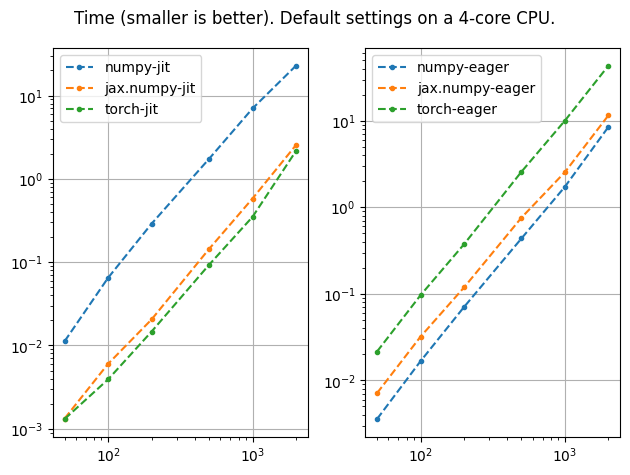

In [32]:
fix, ax = plt.subplots(1, 2)

grouped_jit = utils.group_by(lst, lambda x: x["extra_info"]["jit"])
for i, (jit, group) in enumerate(grouped_jit.items()):
    grouped_xp = utils.group_by(group, lambda x: x["params"]["xp"])
    for backend, grp in grouped_xp.items():
        data = [(x["params"]["N"], x["stats"]["median"]) for x in grp]
        x, y = np.asarray(data).T
        ax[i].plot(x, y, '.--', label=f"{backend}-{jit}")

    ax[i].legend(loc='best')
    ax[i].grid(True)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')

plt.suptitle("Time (smaller is better). Default settings on a 4-core CPU.")
plt.tight_layout()